# Sınıflandırma Modelleri

# Gerekli Kütüphane ve Fonksiyonlar

In [116]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [117]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

# Veri Seti Hikayesi ve Problem: Şeker Hastalığı Tahmini

In [118]:
df = pd.read_csv("./diabetes.csv")

In [119]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Lojistik Regresyon (Logistic Regression)

# Model & Tahmin

In [120]:
df["Outcome"].value_counts()
# Outcome şeker hastalığını ifade eden bir değişken. 1 şeker hastalığına sahip 0 değili ifade ediyor.

0    500
1    268
Name: Outcome, dtype: int64

In [121]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [122]:
y = df["Outcome"] #bağımlı değişken
X = df.drop(["Outcome"], axis = 1) # bağımsız değişken

In [123]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [124]:
loj_model = LogisticRegression(solver = "liblinear").fit(X, y)

In [125]:
loj_model.intercept_
#modelimiz doğrusal bir formdadır.

array([-5.89175767])

In [126]:
loj_model.coef_

array([[ 1.17053857e-01,  2.83878105e-02, -1.68895448e-02,
         7.55295336e-04, -6.42779727e-04,  5.97631361e-02,
         6.77641093e-01,  7.23986346e-03]])

In [127]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [128]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [129]:
y_pred = loj_model.predict(X)

In [130]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [131]:
accuracy_score(y, y_pred)
#Doğruluk oranını verecek.Başarılı yaptığımız durumlar bölü tüm durumdu.

0.7747395833333334

In [132]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [133]:
loj_model.predict_proba(X)[0:10]
#sınıf olasılık değerlerine erişmiş olduk.Sağ taraf 1 ve 0 sınıfı olarak ilerliyor.

array([[0.35040373, 0.64959627],
       [0.91702224, 0.08297776],
       [0.22474194, 0.77525806],
       [0.92139118, 0.07860882],
       [0.16722986, 0.83277014],
       [0.7989895 , 0.2010105 ],
       [0.88019422, 0.11980578],
       [0.27812572, 0.72187428],
       [0.3206045 , 0.6793955 ],
       [0.92273361, 0.07726639]])

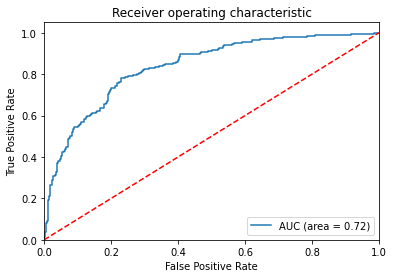

In [134]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X)) #model başarımızı değerlendirmek üzere False-Positive rate ve True-Positive rate üzerinden oluşturulan bir grafik 
# aracılığıyla bize bilgi sunan bir değerdir.Eğri altındaki alanla ilgileniyoruz.Eğri altındaki alan ne kadar büyükse modelimiz o kdar başarılıdır.
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Model Tuning (Model Doğrulama)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [136]:
loj_model = LogisticRegression(solver = "liblinear").fit(X_train,y_train)

In [137]:
y_pred = loj_model.predict(X_test)

In [138]:
print(accuracy_score(y_test, y_pred))

0.7532467532467533


In [139]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()
# k katlı çapraz doğrulama yöntemini kullandık.Test setine ilişkin daha doğru test hatasına erişmiş olduk.

0.7704710144927536

In [140]:
#Bizim modelin başarısını değerlendirmek için izleyeceğimiz yol accuracy_score olacak.Bu skor ne kadar büyük olursa sınıflandırmamız o kadar başarılı olacak.
#Hiperparametrelerin optimum değerlerine ulaşmak için de cross validation yöntemini kullanacağız.

# K-En Yakın Komşu (KNN)

In [141]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [142]:
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

# Model & Tahmin

In [143]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [144]:
knn_model

KNeighborsClassifier()

In [145]:
y_pred = knn_model.predict(X_test)

In [146]:
accuracy_score(y_test,y_pred)
#doğru sınıflandırma oranımız.

0.6883116883116883

In [147]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



# Model Tuning

In [148]:
knn = KNeighborsClassifier()

In [149]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [150]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [151]:
knn_cv_model.best_score_

0.748637316561845

In [152]:
knn_cv_model.best_params_

{'n_neighbors': 11}

In [153]:
#Final Modelimiz

In [154]:
knn_tuned = KNeighborsClassifier(n_neighbors = 11).fit(X_train, y_train)

In [155]:
y_pred = knn_tuned.predict(X_test)

In [156]:
accuracy_score(y_test, y_pred)

0.7316017316017316

In [157]:
knn_tuned.score(X_test, y_test)
#yukarıdaki ile aynı işlemdir.

0.7316017316017316

# Destek Vektör Makineleri (SVM)

In [70]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

# Model & Tahmin

In [72]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

SVM'de doğrusal ve doğrusal olmayan birbirinden farklı yaklaşımlar söz konusu.Burada model ve tahmin bölümünde doğrusal bir yapı ele alacağız.Model tuning bölümündeyse hem
rbf adı verilen hem de linear olan iki farklı yaklaşımı değerlendirmiş olacağız.Yani doğrusal ve doğrusal olmayan SVM'yi model tuning bölümünde ele alacağız.

In [73]:
svm_model

SVC(kernel='linear')

In [74]:
y_pred = svm_model.predict(X_test)

In [75]:
accuracy_score(y_test, y_pred)

0.7445887445887446

# Model Tuning

In [76]:
svm = SVC()

In [78]:
svm_params = {"C": np.arange(1,10), "kernel": ["linear","rbf"]}
#C bizim ceza parametremiz.
#"kernel": ["linear","rbf"] iki farklı kerneli denemesini istiyoruz.

In [79]:
svm_cv_model = GridSearchCV(svm, svm_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [80]:
svm_cv_model.best_params_

{'C': 2, 'kernel': 'linear'}

In [82]:
svm_cv_model.best_score_

0.7839044652128765

In [83]:
svm_tuned = SVC(C = 2, kernel = "linear").fit(X_train, y_train)

In [84]:
y_pred = svm_tuned.predict(X_test)

In [85]:
accuracy_score(y_test, y_pred)

0.7445887445887446

# Yapay Sinir Ağları (Çok Katmanlı Algılayıcılar)

In [86]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [93]:
scaler = StandardScaler()

In [94]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [95]:
scaler.fit(X_test)
X_test = scaler.transform(X_test)

# Model & Tahmin

In [96]:
mlpc_model = MLPClassifier().fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [97]:
mlpc_model.coefs_

[array([[-1.16484044e-02, -1.57917286e-01,  9.70296776e-03,
         -1.23857074e-01,  1.60385902e-01,  1.04666140e-02,
          3.86660497e-01,  9.81797232e-03, -1.15017649e-01,
         -2.04040318e-01,  1.60451771e-01,  8.05445588e-02,
         -2.20779948e-01,  1.45657428e-01, -1.81936963e-01,
         -6.68810050e-02,  1.29703822e-02,  3.17714970e-01,
          8.58716436e-02, -1.28451288e-01, -2.63160666e-01,
         -5.39666552e-02,  2.23742865e-01, -1.66828400e-01,
          1.06027634e-01,  2.75927820e-01, -1.55489466e-01,
          1.14284918e-01, -3.15901267e-01,  2.36854510e-02,
         -1.09956327e-01, -2.91389203e-01,  2.30348583e-01,
         -1.04273790e-01, -1.59197946e-01, -1.19947147e-02,
         -2.18724462e-01,  1.16758893e-01,  1.14332983e-01,
         -2.03882583e-01, -3.81330068e-01,  7.37540229e-03,
         -1.04981282e-02, -5.92733041e-02,  2.57345132e-01,
          2.21798751e-01,  1.97727069e-01,  3.79101958e-02,
         -8.08443835e-02, -1.25771370e-0

In [98]:
y_pred = mlpc_model.predict(X_test)

In [99]:
accuracy_score(y_test, y_pred)

0.7316017316017316

# Model Tuning

In [100]:
mlpc_params = {"alpha":[1,5, 0.1,0.01, 0.03, 0.005, 0.0001],
              "hidden_layer_sizes": [(10,10), (100,100,100), (100,100), (3,5)]}

In [101]:
mlpc = MLPClassifier(solver = "lbfgs", activation = "logistic")

In [102]:
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


In [103]:
mlpc_cv_model.best_params_

{'alpha': 1, 'hidden_layer_sizes': (3, 5)}

In [104]:
#finalmodel

In [105]:
mlpc_tuned = MLPClassifier(solver = "lbfgs",activation='logistic', alpha = 1, hidden_layer_sizes = (3,5)).fit(X_train, y_train)

In [106]:
y_pred = mlpc_tuned.predict(X_test)

In [107]:
accuracy_score(y_test, y_pred)

0.7575757575757576

# CART (Classification and Regression Tree)

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

# Model & Tahmin

In [18]:
cart_model = DecisionTreeClassifier().fit(X_train, y_train)

In [19]:
cart_model

DecisionTreeClassifier()

In [20]:
y_pred = cart_model.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred)

0.7012987012987013

# Model Tuning

In [23]:
cart = DecisionTreeClassifier()

In [26]:
cart_params = {"max_depth": [1,3,5,8,10],
              "min_samples_split": [2,3,5,10,20,50]}

In [27]:
cart_cv_model = GridSearchCV(cart, cart_params, cv=10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [28]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 20}

In [29]:
#final bölüm

In [30]:
cart_tuned = DecisionTreeClassifier(max_depth = 5, min_samples_split=20).fit(X_train, y_train)

In [31]:
y_pred = cart_tuned.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred)

0.7532467532467533

# Random Forests

In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

# Model & Tahmin

In [35]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [36]:
rf_model

RandomForestClassifier()

In [37]:
y_pred = rf_model.predict(X_test)

In [38]:
accuracy_score(y_test, y_pred)

0.7359307359307359

# Model Tuning

In [39]:
rf = RandomForestClassifier()

In [41]:
rf_params = {"n_estimators": [100,200,500,1000],
            "max_features": [3,5,7,8],
            "min_samples_split": [2,5,10,20]}
# n_estimators:kullanılacak olan ağaç sayısı
# max_features:bölünmelerde göz önünde bulundurulması gereken maksimum değişken sayısını ifade ediyor.

In [42]:
rf_cv_model = GridSearchCV(rf, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [43]:
rf_cv_model.best_params_

{'max_features': 5, 'min_samples_split': 5, 'n_estimators': 1000}

In [44]:
rf_tuned = RandomForestClassifier(max_features = 5, min_samples_split=5, n_estimators=1000).fit(X_train, y_train)

In [45]:
y_pred = rf_tuned.predict(X_test)

In [46]:
accuracy_score(y_test, y_pred)

0.7489177489177489

# Değişken Önem Düzeyleri

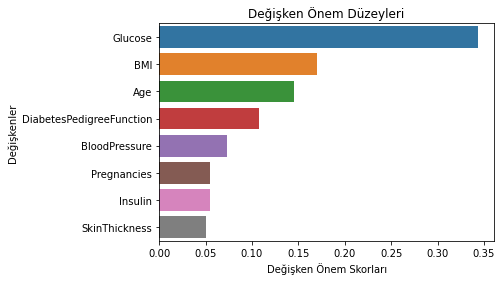

In [47]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
#Amacımız daha az değişkenle en çok açıklanabilirliği sağlamak.
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

# Gradient Boosting Machines

# Model & Tahmin

In [48]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [49]:
gbm_model

GradientBoostingClassifier()

In [50]:
y_pred = gbm_model.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred)

0.7445887445887446

# Model Tuning

In [52]:
gbm_model = GradientBoostingClassifier()

In [53]:
gbm_params = {"learning_rate": [0.1, 0.01, 0.001, 0.05],
             "n_estimators": [100, 300, 500, 1000],
             "max_depth":[2,3,5,8]}

In [54]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [55]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}

In [56]:
#final model

In [57]:
gbm_tuned = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=300).fit(X_train, y_train)

In [58]:
y_pred = gbm_tuned.predict(X_test)

In [59]:
accuracy_score(y_test, y_pred)

0.7402597402597403

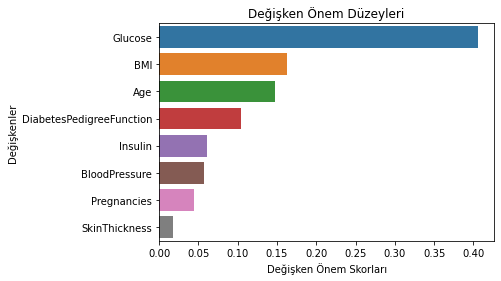

In [60]:
feature_imp = pd.Series(gbm_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

# XGBoost

# Model & Tahmin

In [61]:
!pip install xgboost

In [62]:
from xgboost import XGBClassifier

In [63]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [67]:
y_pred = xgb_model.predict(X_test)

In [68]:
accuracy_score(y_test,y_pred)

0.7359307359307359

# Model Tuning

In [69]:
xgb = XGBClassifier()

In [70]:
xgb_params = {"n_estimators": [100, 500, 1000],
             "subsample":[0.6,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.001,0.01]}

In [71]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, 
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


In [72]:
xgb_cv_model.best_params_

{'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.6}

In [74]:
xgb_tuned = XGBClassifier(learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.6).fit(X_train, y_train)

In [75]:
y_pred = xgb_tuned.predict(X_test)

In [76]:
accuracy_score(y_test, y_pred)

0.7575757575757576

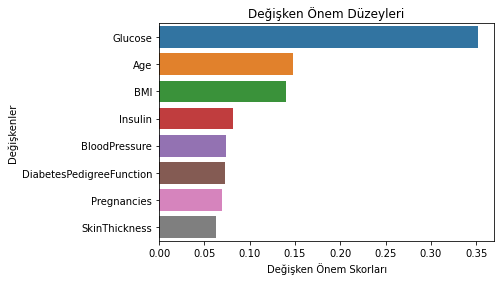

In [77]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

# Light GBM

# Model & Tahmin

In [78]:
!pip install lightgbm

In [86]:
from lightgbm import LGBMClassifier

In [87]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [88]:
y_pred = lgbm_model.predict(X_test)

In [89]:
accuracy_score(y_test, y_pred)

0.7229437229437229

# Model Tuning

In [90]:
lgbm = LGBMClassifier()

In [91]:
lgbm_params = {"learning_rate": [0.001, 0.01, 0.1],
              "n_estimators": [200, 500, 100],
              "max_depth":[1,2,35,8]}

In [92]:
lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [93]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}

In [94]:
lgbm_tuned = LGBMClassifier(learning_rate=0.01, max_depth=1, n_estimators=500).fit(X_train, y_train)

In [95]:
y_pred = lgbm_tuned.predict(X_test)

In [96]:
accuracy_score(y_test, y_pred)

0.7575757575757576

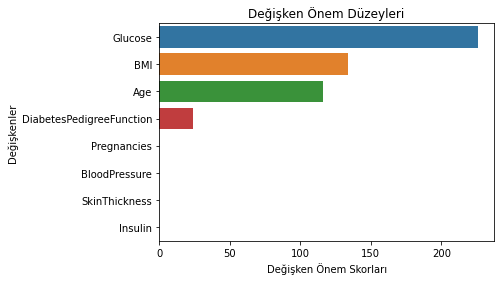

In [97]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

# CatBoost

# Model & Tahmin

In [98]:
!pip install catboost

In [99]:
from catboost import CatBoostClassifier

In [101]:
catb_model = CatBoostClassifier().fit(X_train, y_train, verbose = False)

In [102]:
y_pred = catb_model.predict(X_test)

In [103]:
accuracy_score(y_test, y_pred)

0.7402597402597403

# Model Tuning

In [104]:
catb = CatBoostClassifier()

In [106]:
catb_params = {"iterations":[200,500,100],
              "learning_rate":[0.01, 0.03, 0.1],
              "depth":[4,5,8]}
# iterations:Ağaç sayısını anlamına gelir.

In [107]:
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 0.6863312	total: 5.22ms	remaining: 1.04s
1:	learn: 0.6811157	total: 9.96ms	remaining: 986ms
2:	learn: 0.6752970	total: 14.8ms	remaining: 971ms
3:	learn: 0.6697432	total: 19.6ms	remaining: 960ms
4:	learn: 0.6641758	total: 24.3ms	remaining: 949ms
5:	learn: 0.6576656	total: 29ms	remaining: 938ms
6:	learn: 0.6521870	total: 34ms	remaining: 936ms
7:	learn: 0.6465564	total: 38.8ms	remaining: 931ms
8:	learn: 0.6407595	total: 43.6ms	remaining: 926ms
9:	learn: 0.6357725	total: 48.4ms	remaining: 919ms
10:	learn: 0.6299942	total: 53.2ms	remaining: 914ms
11:	learn: 0.6240480	total: 58.2ms	remaining: 912ms
12:	learn: 0.6196095	total: 63.3ms	remaining: 911ms
13:	learn: 0.6148715	total: 68.2ms	remaining: 906ms
14:	learn: 0.6092626	total: 73.1ms	remaining: 901ms
15:	learn: 0.6046764	total: 77.9ms	remaining: 895ms
16:	learn: 0.6012725	total: 82.6ms	remaining: 890ms
17:	learn: 0.5958121	total: 87.4ms	remaining: 884ms
18:	learn: 0.590

In [108]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [109]:
catb_tuned =  CatBoostClassifier(depth=8, iterations=200, learning_rate=0.01).fit(X_train, y_train)

0:	learn: 0.6863312	total: 5.84ms	remaining: 1.16s
1:	learn: 0.6811157	total: 11.2ms	remaining: 1.11s
2:	learn: 0.6752970	total: 16.6ms	remaining: 1.09s
3:	learn: 0.6697432	total: 22ms	remaining: 1.08s
4:	learn: 0.6641758	total: 27.1ms	remaining: 1.06s
5:	learn: 0.6576656	total: 32.3ms	remaining: 1.04s
6:	learn: 0.6521870	total: 37.3ms	remaining: 1.03s
7:	learn: 0.6465564	total: 42.2ms	remaining: 1.01s
8:	learn: 0.6407595	total: 47.3ms	remaining: 1s
9:	learn: 0.6357725	total: 52.9ms	remaining: 1s
10:	learn: 0.6299942	total: 58.1ms	remaining: 998ms
11:	learn: 0.6240480	total: 63.4ms	remaining: 993ms
12:	learn: 0.6196095	total: 68.2ms	remaining: 981ms
13:	learn: 0.6148715	total: 73ms	remaining: 970ms
14:	learn: 0.6092626	total: 78.2ms	remaining: 965ms
15:	learn: 0.6046764	total: 84.3ms	remaining: 970ms
16:	learn: 0.6012725	total: 89.2ms	remaining: 960ms
17:	learn: 0.5958121	total: 94.4ms	remaining: 954ms
18:	learn: 0.5903243	total: 99.1ms	remaining: 944ms
19:	learn: 0.5866024	total: 104m

In [110]:
y_pred = catb_tuned.predict(X_test)

In [111]:
accuracy_score(y_test, y_pred)

0.7532467532467533

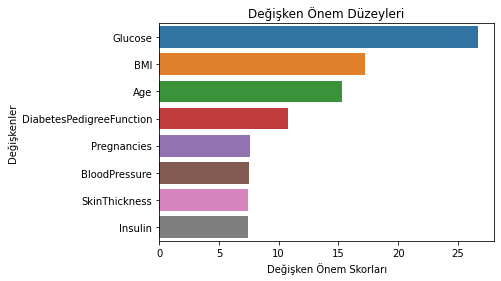

In [112]:
feature_imp = pd.Series(catb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()